In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import seaborn as sns

/dsw/snapshots/snapshot_dsw_default_jupyter/python37/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
# Label:
#     - The hourly average gub per plan per scan at city-level
#     - Unit: USD

# Feature Set:
#     avg(plans.driver_cancel_prob) as market_driver_cancel_prob,
#     avg(plans.rider_cancel_prob) as market_rider_cancel_prob,
#     avg(plans.spinner_cancel_prob) as market_spinner_cancel_prob,
#     avg(plans.eta) as market_eta,
#     avg(plans.surge_mul) as market_surge_mul,
#     avg(plans.eventual_comp_prob) as market_eventual_comp_prob,
#     avg(completed.client_upfront_fare_usd) as market_gb,
#     avg(completed.base_fare_usd) as market_gub,

#     avg(plans.eta_one) as market_eta_one,  -- (1 - eta/1500)
#     avg(plans.eta_one_twenty) as market_eta_one_twenty, -- (1 - eta/1500)^1.2
#     avg(plans.eta_one_quarter) as market_eta_one_quarter, -- (1 - eta/1500)^1.25
#     avg(plans.eta_square) as market_eta_square,  -- (1 - eta/1500)**2
#     avg(plans.eta_cube) as market_eta_cube,  -- (1 - eta/1500)**3
#     avg(plans.network_contention_2) as market_network_contention_2,  -- 1 / (1 + surge_mul**2)
#     avg(plans.network_contention_3) as market_network_contention_3,  -- 1 / (1 + surge_mul**3)
#     avg(plans.network_contention_5) as market_network_contention_5,  -- 1 / (1 + surge_mul**5)

#     avg(plans.cr_ratio) as market_cr_ratio,  -- (1.0 - mgv.driver_cancel_prob) * (1.0 - mgv.rider_cancel_prob) * (1.0 - mgv.spinner_cancel_prob) + mgv.eventual_comp_prob * mgv.driver_cancel_prob

#     avg(plans.eta_one * plans.cr_ratio) as market_eta_one_cr_ratio,
#     avg(plans.eta_one_twenty * plans.cr_ratio) as market_eta_one_twenty_cr_ratio,
#     avg(plans.eta_one_quarter * plans.cr_ratio) as market_eta_one_quarter_cr_ratio,
#     avg(plans.eta_square * plans.cr_ratio) as market_eta_square_cr_ratio,
#     avg(plans.eta_cube * plans.cr_ratio) as market_eta_cube_cr_ratio,
#     avg(plans.network_contention_2 * plans.eta_one) as market_network_2_eta_1,
#     avg(plans.network_contention_3 * plans.eta_one) as market_network_3_eta_1,
#     avg(plans.network_contention_5 * plans.eta_one) as market_network_5_eta_1,
#     avg(plans.network_contention_2 * plans.eta_one_twenty) as market_network_2_eta_1_20,
#     avg(plans.network_contention_3 * plans.eta_one_twenty) as market_network_3_eta_1_20,
#     avg(plans.network_contention_5 * plans.eta_one_twenty) as market_network_5_eta_1_20,
#     avg(plans.network_contention_2 * plans.eta_one_quarter) as market_network_2_eta_1_25,
#     avg(plans.network_contention_3 * plans.eta_one_quarter) as market_network_3_eta_1_25,
#     avg(plans.network_contention_5 * plans.eta_one_quarter) as market_network_5_eta_1_25,
#     avg(plans.network_contention_2 * plans.eta_square) as market_network_2_eta_2,
#     avg(plans.network_contention_3 * plans.eta_square) as market_network_3_eta_2,
#     avg(plans.network_contention_5 * plans.eta_square) as market_network_5_eta_2,
#     avg(plans.network_contention_2 * plans.eta_cube) as market_network_2_eta_3,
#     avg(plans.network_contention_3 * plans.eta_cube) as market_network_3_eta_3,
#     avg(plans.network_contention_5 * plans.eta_cube) as market_network_5_eta_3,
#     avg((1 - plans.network_contention_2) * plans.cr_ratio) as market_network_2_cr_ratio,
#     avg((1 - plans.network_contention_3) * plans.cr_ratio) as market_network_3_cr_ratio,
#     avg((1 - plans.network_contention_5) * plans.cr_ratio) as market_network_5_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_cr_ratio,
#     avg(plans.eta_one * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_cr_ratio,
#     avg(plans.eta_one_twenty * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_20_cr_ratio,
#     avg(plans.eta_one_twenty * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_20_cr_ratio,
#     avg(plans.eta_one_twenty * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_20_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_1_25_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_1_25_cr_ratio,
#     avg(plans.eta_one_quarter * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_1_25_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_2_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_2_cr_ratio,
#     avg(plans.eta_square * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_2_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_2 * plans.cr_ratio) as market_network_2_eta_3_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_3 * plans.cr_ratio) as market_network_3_eta_3_cr_ratio,
#     avg(plans.eta_cube * plans.network_contention_5 * plans.cr_ratio) as market_network_5_eta_3_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_1_gb_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_1_gb_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_1_gb_cr_ratio,
#     avg(plans.eta_one_twenty * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_1_20_gb_cr_ratio,
#     avg(plans.eta_one_twenty * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_1_20_gb_cr_ratio,
#     avg(plans.eta_one_twenty * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_1_20_gb_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_1_25_gb_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_1_25_gb_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_1_25_gb_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_2_gb_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_2_gb_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_2_gb_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_2) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_2_eta_3_gb_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_3) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_3_eta_3_gb_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_5) * plans.cr_ratio * completed.client_upfront_fare_usd) as market_network_5_eta_3_gb_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_usd) as market_network_2_eta_1_gub_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_usd) as market_network_3_eta_1_gub_cr_ratio,
#     avg(plans.eta_one * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_usd) as market_network_5_eta_1_gub_cr_ratio,
#     avg(plans.eta_one_twenty * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_usd) as market_network_2_eta_1_20_gub_cr_ratio,
#     avg(plans.eta_one_twenty * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_usd) as market_network_3_eta_1_20_gub_cr_ratio,
#     avg(plans.eta_one_twenty * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_usd) as market_network_5_eta_1_20_gub_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_usd) as market_network_2_eta_1_25_gub_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_usd) as market_network_3_eta_1_25_gub_cr_ratio,
#     avg(plans.eta_one_quarter * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_usd) as market_network_5_eta_1_25_gub_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_usd) as market_network_2_eta_2_gub_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_usd) as market_network_3_eta_2_gub_cr_ratio,
#     avg(plans.eta_square * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_usd) as market_network_5_eta_2_gub_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_2) * plans.cr_ratio * completed.base_fare_usd) as market_network_2_eta_3_gub_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_3) * plans.cr_ratio * completed.base_fare_usd) as market_network_3_eta_3_gub_cr_ratio,
#     avg(plans.eta_cube * (1 - plans.network_contention_5) * plans.cr_ratio * completed.base_fare_usd) as market_network_5_eta_3_gub_cr_ratio

In [3]:
# Read in data: features & labels
df_features_dict = {}
df_labels_dict = {}

num_feature_files = 15
num_label_files = 15

for i in range(1, num_feature_files):
    df_features_dict[i] = pd.read_csv(f'emea_hourly_features_{i}.csv')

for i in range(1, num_label_files):
    df_labels_dict[i] = pd.read_csv(f'emea_hourly_labels_{i}.csv')

In [4]:
df_features_frames = [df_features_dict[1], df_features_dict[2], df_features_dict[3],
                      df_features_dict[4], df_features_dict[5], df_features_dict[6],
                      df_features_dict[7], df_features_dict[8], df_features_dict[9],
                      df_features_dict[10], df_features_dict[11], df_features_dict[12],
                      df_features_dict[13], df_features_dict[14]
                     ]

df_labels_frames = [df_labels_dict[1], df_labels_dict[2], df_labels_dict[3],
                    df_labels_dict[4], df_labels_dict[5], df_labels_dict[6],
                    df_labels_dict[7], df_labels_dict[8], df_labels_dict[9],
                    df_labels_dict[10], df_labels_dict[11], df_labels_dict[12],
                    df_labels_dict[13], df_labels_dict[14]
                   ]

df_features = pd.concat(df_features_frames, ignore_index=True)
df_labels = pd.concat(df_labels_frames, ignore_index=True)

df_features.drop('num_plans', axis=1, inplace=True)
df_labels.drop('num_plans', axis=1, inplace=True)

df = pd.merge(df_features, df_labels,
              how='left',
              left_on=['datestr', 'city_id', 'hour_of_day'],
              right_on=['datestr', 'city_id', 'hour_of_day']
             )

In [5]:
gub_90 = df['hour_gub_gamma_90']

X = df.loc[:, ['market_driver_cancel_prob',
                'market_rider_cancel_prob',
                'market_spinner_cancel_prob',
                'market_surge_mul',
                'market_eventual_comp_prob',
                'market_eta_one',
                'market_eta_one_twenty',
                'market_eta_one_quarter',
                'market_eta_square',
                'market_eta_cube',
                'market_network_contention_2',
                'market_network_contention_3',
                'market_network_contention_5',
                'market_cr_ratio',
                'market_eta_one_cr_ratio',
                'market_eta_one_twenty_cr_ratio',
                'market_eta_square_cr_ratio',
                'market_eta_cube_cr_ratio',
                'market_network_2_eta_1',
                'market_network_3_eta_1',
                'market_network_5_eta_1',
                'market_network_2_eta_1_20',
                'market_network_3_eta_1_20',
                'market_network_5_eta_1_20',
                'market_network_2_eta_1_25',
                'market_network_3_eta_1_25',
                'market_network_5_eta_1_25',
                'market_network_2_eta_2',
                'market_network_3_eta_2',
                'market_network_5_eta_2',
                'market_network_2_eta_3',
                'market_network_3_eta_3',
                'market_network_5_eta_3',
                'market_network_2_cr_ratio',
                'market_network_3_cr_ratio',
                'market_network_5_cr_ratio',
                'market_network_2_eta_1_cr_ratio',
                'market_network_3_eta_1_cr_ratio',
                'market_network_5_eta_1_cr_ratio',
                'market_network_2_eta_1_20_cr_ratio',
                'market_network_3_eta_1_20_cr_ratio',
                'market_network_5_eta_1_20_cr_ratio',
                'market_network_2_eta_1_25_cr_ratio',
                'market_network_3_eta_1_25_cr_ratio',
                'market_network_5_eta_1_25_cr_ratio',
                'market_network_2_eta_2_cr_ratio',
                'market_network_3_eta_2_cr_ratio',
                'market_network_5_eta_2_cr_ratio',
                'market_network_2_eta_3_cr_ratio',
                'market_network_3_eta_3_cr_ratio',
                'market_network_5_eta_3_cr_ratio',
                'market_network_2_eta_1_gb_cr_ratio',
                'market_network_3_eta_1_gb_cr_ratio',
                'market_network_5_eta_1_gb_cr_ratio',
                'market_network_2_eta_1_20_gb_cr_ratio',
                'market_network_3_eta_1_20_gb_cr_ratio',
                'market_network_5_eta_1_20_gb_cr_ratio',
                'market_network_2_eta_1_25_gb_cr_ratio',
                'market_network_3_eta_1_25_gb_cr_ratio',
                'market_network_5_eta_1_25_gb_cr_ratio',
                'market_network_2_eta_2_gb_cr_ratio',
                'market_network_3_eta_2_gb_cr_ratio',
                'market_network_5_eta_2_gb_cr_ratio',
                'market_network_2_eta_3_gb_cr_ratio',
                'market_network_3_eta_3_gb_cr_ratio',
                'market_network_5_eta_3_gb_cr_ratio',
                'market_network_2_eta_1_gub_cr_ratio',
                'market_network_3_eta_1_gub_cr_ratio',
                'market_network_5_eta_1_gub_cr_ratio',
                'market_network_2_eta_1_20_gub_cr_ratio',
                'market_network_3_eta_1_20_gub_cr_ratio',
                'market_network_5_eta_1_20_gub_cr_ratio',
                'market_network_2_eta_1_25_gub_cr_ratio',
                'market_network_3_eta_1_25_gub_cr_ratio',
                'market_network_5_eta_1_25_gub_cr_ratio',
                'market_network_2_eta_2_gub_cr_ratio',
                'market_network_3_eta_2_gub_cr_ratio',
                'market_network_5_eta_2_gub_cr_ratio',
                'market_network_2_eta_3_gub_cr_ratio',
                'market_network_3_eta_3_gub_cr_ratio',
                'market_network_5_eta_3_gub_cr_ratio'
              ]
          ]

In [6]:
y = gub_90
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [7]:
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=9)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=9,
   selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
lasso.intercept_

0.1556033602743978

In [9]:
lasso.coef_

array([ 0.15840698, -0.        , -0.        , -0.        , -0.19669039,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.08005955,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.00893049,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.01615362, -0.        , -0.        ,
       -0.        ,  0.20754474,  0.        ,  0.28266934,  0.  

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.Series(lasso.coef_, index = X_train.columns))

market_driver_cancel_prob                 0.158407
market_rider_cancel_prob                 -0.000000
market_spinner_cancel_prob               -0.000000
market_surge_mul                         -0.000000
market_eventual_comp_prob                -0.196690
market_eta_one                           -0.000000
market_eta_one_twenty                    -0.000000
market_eta_one_quarter                   -0.000000
market_eta_square                        -0.000000
market_eta_cube                          -0.000000
market_network_contention_2               0.000000
market_network_contention_3               0.000000
market_network_contention_5               0.000000
market_cr_ratio                          -0.000000
market_eta_one_cr_ratio                  -0.080060
market_eta_one_twenty_cr_ratio           -0.000000
market_eta_square_cr_ratio               -0.000000
market_eta_cube_cr_ratio                 -0.000000
market_network_2_eta_1                   -0.000000
market_network_3_eta_1         

In [11]:
y = gub_90
X = df.loc[:, ['market_driver_cancel_prob',
               'market_eventual_comp_prob',
               'market_eta_one_cr_ratio',
               'market_network_2_eta_1_gb_cr_ratio',              
               'market_network_5_eta_2_gb_cr_ratio',
               'market_network_2_eta_1_gub_cr_ratio',
               'market_network_5_eta_1_gub_cr_ratio'
              ]
          ]

In [12]:
# Add intercept to X
X['intercept'] = [1 for _ in range(len(X.index))]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [14]:
# Model Training
model = sm.OLS(y_train, X_train)

In [15]:
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:      hour_gub_gamma_90   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2404.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:08:40   Log-Likelihood:                 2644.9
No. Observations:                2026   AIC:                            -5274.
Df Residuals:                    2018   BIC:                            -5229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ma

In [16]:
y = gub_90
X = df.loc[:, ['market_driver_cancel_prob',
               'market_eventual_comp_prob',
               'market_network_2_eta_1_gb_cr_ratio',              
               'market_network_5_eta_3_gb_cr_ratio',
               'market_network_2_eta_1_gub_cr_ratio'
              ]
          ]

# Add intercept to X
X['intercept'] = [1 for _ in range(len(X.index))]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

# Model Training
model = sm.OLS(y_train, X_train)

trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:      hour_gub_gamma_90   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     3299.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:08:40   Log-Likelihood:                 2625.9
No. Observations:                2026   AIC:                            -5240.
Df Residuals:                    2020   BIC:                            -5206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ma

In [17]:
trained_model.params

market_driver_cancel_prob              0.196779
market_eventual_comp_prob             -0.342081
market_network_2_eta_1_gb_cr_ratio     0.010237
market_network_5_eta_3_gb_cr_ratio    -0.019416
market_network_2_eta_1_gub_cr_ratio    0.500080
intercept                              0.179520
dtype: float64

In [18]:
# Train RMSE
y_train_pred = trained_model.predict(X_train)
train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
print(f"Train RMSE/y_train: {round(train_rmse / np.mean(y_train), 4)} and {round(train_rmse / np.median(y_train), 4)}")

Train RMSE/y_train: 0.209 and 0.2822


In [19]:
# Test RMSE
y_test_pred = trained_model.predict(X_test)
test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
test_rmse / np.mean(y_test)
print(f"Test RMSE/y_test: {round(test_rmse / np.mean(y_test), 4)} and {round(test_rmse / np.median(y_test), 4)}")

Test RMSE/y_test: 0.1852 and 0.2606


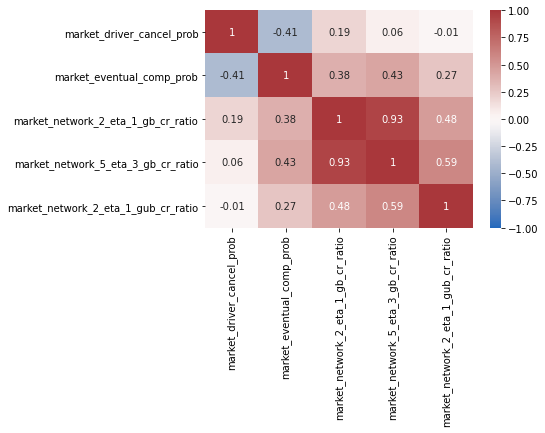

In [20]:
# Visualizing a Pandas Correlation Matrix
corr_matrix = X.loc[:, X.columns != 'intercept'].corr().round(2)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()